# DK sentiment analysis

In [2]:
import time
import pandas as pd
import os
import json
from tqdm import tqdm
import pandas as pd
import re
import nltk
import numpy as np

# Sentiment analysis - descriptives

In [3]:
data_sent_DK = pd.read_csv('/Users/astakettel/Desktop/ISDS/GitHub/ISDS-sentiment-analysis/Webscraping/DK_clean_sent.csv')

### Summary statistics - DK

In [5]:
# Descriptive statistics for sentiments for the whole periode:
data_sent_DK['sentiment'].describe().round(2)

count    12819.00
mean         0.84
std          0.45
min         -1.00
25%          0.97
50%          0.99
75%          1.00
max          1.00
Name: sentiment, dtype: float64

### Descriptive statistics for sentiments each election period:

In [12]:
# Ensure the 'date' column is in datetime format
data_sent_DK['date'] = pd.to_datetime(data_sent_DK['date'])

# List of time periods
time_periods = [('2007-08-13', '2007-11-13'),
                ('2011-06-15', '2011-09-15'),
                ('2015-03-18', '2015-06-18'),
                ('2019-03-05', '2019-06-05'),
                ('2022-09-01', '2022-11-01')]

# Loop through each time period and compute descriptive statistics for 'sentiment'
for start_date, end_date in time_periods:
    # Filter the DataFrame for the given time period
    filtered_data = data_sent_DK[(data_sent_DK['date'] >= start_date) & (data_sent_DK['date'] <= end_date)]
    
    # Compute descriptive statistics for the 'sentiment' column
    sentiment_stats = filtered_data['sentiment'].describe().round(2)
    
    # Print the results
    print(f"Descriptive statistics for period {start_date} to {end_date}:")
    print(sentiment_stats)
    print("\n")

Descriptive statistics for period 2007-08-13 to 2007-11-13:
count    7.00
mean     0.28
std      0.89
min     -0.90
25%     -0.52
50%      0.93
75%      0.98
max      0.99
Name: sentiment, dtype: float64


Descriptive statistics for period 2011-06-15 to 2011-09-15:
count    16.00
mean     -0.13
std       0.91
min      -1.00
25%      -0.91
50%      -0.79
75%       0.89
max       0.96
Name: sentiment, dtype: float64


Descriptive statistics for period 2015-03-18 to 2015-06-18:
count    444.00
mean       0.95
std        0.20
min       -1.00
25%        0.99
50%        0.99
75%        1.00
max        1.00
Name: sentiment, dtype: float64


Descriptive statistics for period 2019-03-05 to 2019-06-05:
count    129.00
mean       0.71
std        0.63
min       -0.99
25%        0.92
50%        0.99
75%        0.99
max        1.00
Name: sentiment, dtype: float64


Descriptive statistics for period 2022-09-01 to 2022-11-01:
count    46.00
mean      0.38
std       0.80
min      -0.98
25%      -0.45
5

### Scatterplot - DK

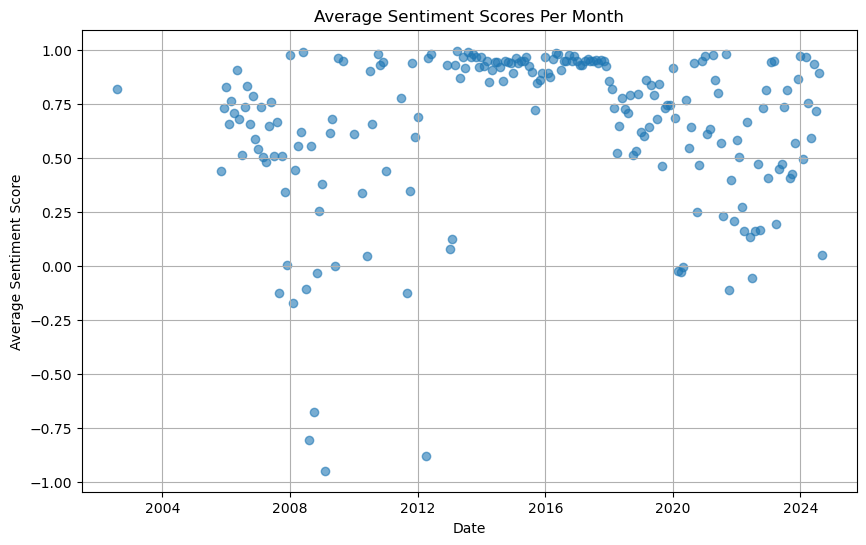

In [14]:
# Scatterplot 
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is in datetime format
data_sent_DK['date'] = pd.to_datetime(data_sent_DK['date'])

# Group by month and calculate the average sentiment for each month
average_sentiment_by_month = data_sent_DK.groupby(pd.Grouper(key='date', freq='ME'))['sentiment'].mean().reset_index()

# Create scatter plot for the average sentiment per month
plt.figure(figsize=(10, 6))

plt.scatter(average_sentiment_by_month['date'], average_sentiment_by_month['sentiment'], alpha=0.6)
plt.title('Average Sentiment Scores Per Month')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')

plt.grid(True)
plt.show()

#  Correlation and Regression


### Defining election data

In [15]:
# initializing dataframe with election data
time_periods = [('2007-08-13', '2007-11-13'),
                ('2011-06-15', '2011-09-15'),
                ('2015-03-18', '2015-06-18'),
                ('2019-03-05', '2019-06-05'),
                ('2022-09-01', '2022-11-01')]
data_elec = {
    'election_dates': ['1990-12-12','1994-09-21',
                       '1998-03-11','2001-11-20', 
                       '2005-02-08', '2007-11-13',
                       '2011-09-15', '2015-06-18',
                       '2019-06-05', '2022-11-01'],
    'change_in_government': [1,1,0,1,0,0,1,1,1,0]}

OLS_data_DK = pd.DataFrame(data_elec)


### Average sentiment scores (3 month interval)
Computing average sentiment scores for the 3 months leading up to the election date: 

In [16]:
data_sent_DK = pd.read_csv('/Users/astakettel/Desktop/ISDS/GitHub/ISDS-sentiment-analysis/Webscraping/DK_clean_sent.csv')

In [17]:
# Ensure the 'date' column in your DataFrame is in datetime format
data_sent_DK['date'] = pd.to_datetime(data_sent_DK['date'])

In [21]:
#1. I start by defining the time periods i want to compute the average sentiments of

# List of time periods (start_date, end_date)
time_periods = [('1990-09-12', '1990-12-12'),
                ('1994-06-21', '1994-09-21'),
                ('1997-12-11', '1998-03-11'),
                ('2001-08-20', '2001-11-20'),
                ('2004-11-08', '2005-02-08'),
                ('2007-08-13', '2007-11-13'),
                ('2011-06-15', '2011-09-15'),
                ('2015-03-18', '2015-06-18'),
                ('2019-03-05', '2019-06-05'),
                ('2022-09-01', '2022-11-01')]

# 2. Then i define a function to compute the average sentiment scores 
    # found in the articles written within a defined interval: 

def compute_average_sentiment(df, start_date, end_date):
    # Convert string dates to datetime if necessary
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Filter DataFrame for the specific time period
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Calculate the average sentiment
    average_sentiment = filtered_df['sentiment'].mean()
    
    return average_sentiment

# 3. Then i loop through each interval to get the average sentiment for each interval: 

# Dictionary to store the results for each time period
average_sentiments_DK = {}

for start_date, end_date in time_periods:
    avg_sentiment = compute_average_sentiment(data_sent_DK, start_date, end_date)
    average_sentiments_DK[(start_date, end_date)] = avg_sentiment

In [22]:
# Now i store the average sentiment scores in a list: 
sent_3M = list(list(average_sentiments_DK.values()))

# And append the list as a column in the dataframe OLS_data:
OLS_data_DK['sent_3M'] = sent_3M

### Return 3 months

In [25]:
# Making a list with return_3M from Theis research and storing it in the dataframe:
return_3M = [-10.048876, -2.870091,
            10.948177, -10.812704,
            7.717629, 0.225937, 
            -19.138613, 3.45083,
            -2.1435, -8.759347]
OLS_data_DK['return_3M'] = return_3M

In [14]:
OLS_data

,election_dates,change_in_government,sent_3M,return_3M
0,2020-11-03,1,0.518694,2.262787
1,2016-11-08,1,0.407191,-1.895098
2,2012-11-06,0,0.546422,-2.450098
3,2008-11-04,1,0.041382,-19.476870
4,2004-11-02,0,NaN,2.162441
5,2000-11-07,1,NaN,-3.207555
6,1996-11-05,0,NaN,8.165336
7,1992-11-03,0,NaN,-1.216213


# Correlation analysis

In [27]:
# pearson: 
corr_matri_p = OLS_data_DK[['return_3M', 'sent_3M', 'change_in_government']].corr(method='pearson').round(2)

print(corr_matri_p)


                      return_3M  sent_3M  change_in_government
return_3M                  1.00     0.84                 -0.53
sent_3M                    0.84     1.00                  0.24
change_in_government      -0.53     0.24                  1.00


# Example code for OLS regression

In [28]:
# As we dont have articles from all time periods we remove the rows that contain missing information: 
OLS_data_sub = OLS_data_DK.dropna()


In [31]:
import pandas as pd
import statsmodels.api as sm
# Define the dependent and independent variables
X = OLS_data_sub[['return_3M','sent_3M']]  # Independent variables (X1, X2)
Y = OLS_data_sub['change_in_government']           # Dependent variable (Y)

# Add a constant to the independent variables (this adds the intercept term)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Print the OLS regression results
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     change_in_government   R-squared:                       0.373
Model:                              OLS   Adj. R-squared:                 -0.255
Method:                   Least Squares   F-statistic:                    0.5940
Date:                  Thu, 22 Aug 2024   Prob (F-statistic):              0.627
Time:                          12:37:53   Log-Likelihood:                -2.3613
No. Observations:                     5   AIC:                             10.72
Df Residuals:                         2   BIC:                             9.551
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3810      0.941

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
